In [10]:
from bs4 import BeautifulSoup
import pymongo
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# IMBD Web Scrape
movie_titles = []

In [3]:
# web scrape code here 
starts = ['1', '51', '101', '151', '201', '251', '301', '351', '401', '451', '501', '551', '601', '651', '701', '751', '801', '851', '901', '951']

for start in starts:
    imdb_url = f'https://www.imdb.com/search/title/?title_type=feature&release_date=2010-01-01,2019-12-31&view=simple&sort=num_votes,desc&start={start}&ref_=adv_nxt'
    imdb_response = requests.get(imdb_url)
    soup = BeautifulSoup(imdb_response.text, 'html')
    results = soup.find_all('div', class_='col-title')
    
    for result in results:
        title = result.find('a').text
        movie_titles.append(title)
    
movie_titles

['Inception',
 'The Dark Knight Rises',
 'Interstellar',
 'Django Unchained',
 'The Avengers',
 'The Wolf of Wall Street',
 'Shutter Island',
 'Guardians of the Galaxy',
 'Deadpool',
 'Mad Max: Fury Road',
 'Star Wars: Episode VII - The Force Awakens',
 'The Hunger Games',
 'Gone Girl',
 'Joker',
 'Avengers: Infinity War',
 'Gravity',
 'The Hobbit: An Unexpected Journey',
 'Harry Potter and the Deathly Hallows: Part 2',
 'Iron Man Three',
 'Toy Story 3',
 'The Martian',
 'The Intouchables',
 'Thor',
 'Avengers: Endgame',
 'Captain America: The First Avenger',
 'Avengers: Age of Ultron',
 'Captain America: The Winter Soldier',
 'Iron Man 2',
 'Black Swan',
 'The Grand Budapest Hotel',
 'Whiplash',
 'The Revenant',
 'Man of Steel',
 'The Imitation Game',
 'X-Men: Days of Future Past',
 'Silver Linings Playbook',
 'How to Train Your Dragon',
 'Captain America: Civil War',
 'X: First Class',
 "The King's Speech",
 'Skyfall',
 'Logan',
 '12 Years a Slave',
 'Batman v Superman: Dawn of Justi

In [4]:
# OMDB requests
url = "http://www.omdbapi.com/?t="
api_key = "&apikey=trilogy"

In [5]:
# for loop to access movie titles, and reques OMDB information to dump into JSON output

output = [] # list for our json objects from OMDB

for movie in movie_titles: 
    response = requests.get(url + movie + api_key)
    data = response.json()
    output.append(data)
    
with open('data.json', 'w') as outfile:
    json.dump(output, outfile)
        
pprint(data) #will print only the last movie called - shows that for loop works

{'Actors': 'Johnny Depp, Gwyneth Paltrow, Paul Bettany, Ewan McGregor',
 'Awards': '1 win & 8 nominations.',
 'BoxOffice': '$6,847,536',
 'Country': 'UK, USA',
 'DVD': '12 May 2015',
 'Director': 'David Koepp',
 'Genre': 'Action, Adventure, Comedy, Crime, Mystery, Romance',
 'Language': 'English',
 'Metascore': '27',
 'Plot': 'Juggling angry Russians, the British Mi5, and an international '
         'terrorist, debonair art dealer and part-time rogue Charlie Mortdecai '
         'races to recover a stolen painting rumored to contain a code that '
         'leads to lost gold.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMjM3NDcxOTM5Ml5BMl5BanBnXkFtZTgwNTEwNzE0MzE@._V1_SX300.jpg',
 'Production': 'Liongate Films',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.5/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '12%'},
             {'Source': 'Metacritic', 'Value': '27/100'}],
 'Released': '23 Jan 2015',
 'Response': 'True',
 'Runtime': '10

In [6]:
metascores = []

index = 0

while index < len(movie_titles):
    for metascore in output[index]:
        try:
            metascore = output[index]['Metascore']
            metascores.append(metascore)
            index = index + 1
        except KeyError:
            print('Key Error')
            index = index + 1
            

len(metascores)

Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error


993

In [21]:
metascore_ints = []

for metascore in metascores:
    try:
        metascore_int = int(metascore)
        metascore_ints.append(metascore_int)
    except ValueError:
        print("Value Error")
    
# metascore_ints

Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error


In [23]:
max_score = max(metascore_ints)
min_score = min(metascore_ints)

print(f'Max Score is: {max_score}')
print(f'Min Score is: {min_score}')

Max Score is: 100
Min Score is: 18


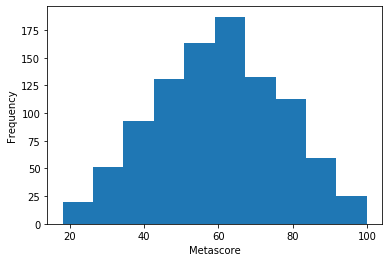

In [20]:
plt.hist(metascore_ints, bins = 10)
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.show()

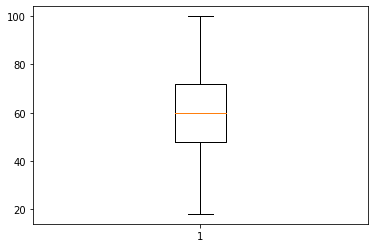

In [25]:
plt.boxplot(metascore_ints)
plt.show()